#### Python Imaging Library(PIL)은 파이썬 인터프리터에 다양한 이미지 파일 형식을 지원하고  
#### 강력한 이미지 처리와 그래픽 기능을 제공하는 자유-오픈 소스 소프트웨어 라이브러리

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
#!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 내 os의 home 디렉토리 확인

In [2]:
os.getenv("HOME")

'/home/ssac6'

#### 가위 바위 보 이미지를 28x28로 사이즈 조정
#### - 가위 (scissor), 바위 (rock), 보 (paper) 이미지가 들어 있는  각 디렉토리명을 feature 변수에 담아 반복문에서 처리

In [3]:
import os

feature = ['scissor','rock','paper']
for a in feature:
     # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/" + a
    print("이미지 디렉토리 경로: ", image_dir_path)

    images=glob.glob(image_dir_path + "/*.jpg")  

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

    print(f"{a} 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac6/aiffel/rock_scissor_paper/scissor
scissor 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac6/aiffel/rock_scissor_paper/rock
rock 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac6/aiffel/rock_scissor_paper/paper
paper 이미지 resize 완료!


#### 학습데이터 준비

In [2]:
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3000   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


In [ ]:
"""
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train,
                                                  test_size = 0.33,
                                                  random_state = 777)
"""                                                  

In [19]:

from sklearn.model_selection import KFold
# K-Fold를 진행해봅니다.
k = 5

# 주어진 데이터셋을 k만큼 등분합니다.
# 여기서는 3이므로 훈련 데이터셋(404개)를 3등분하여
# 1개는 검증셋으로, 나머지 2개는 훈련셋으로 활용합니다.
kfold = KFold(n_splits=k, random_state = 777)

# 재사용을 위해 모델을 반환하는 함수를 정의합니다.
def get_model():
    """
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (13, )))
    model.add(Dense(32, activation = 'relu')) 
    model.add(Dense(1))   

    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    """
    
    model=keras.models.Sequential()

    model.add(keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(28,28,3)))
    #Conv2D()의 16, 32는 얼마나 다양한 이미지의 특징을 살펴볼 것인가? ( 입력 이미지가 다양할수록 더 많은 특징을 고려해보자. )
    #input_shape=(28,28,1) 입력이미지의 형태 1은 뭘까? 1은 채널 수 흑백이기 때문에 1 칼라라면 3
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(8, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

accuracy_list = [] # 테스트셋을 평가한 후 결과 mae를 담을 리스트를 선언합니다.
# k번 진행합니다.
for train_index, val_index in kfold.split(x_train_norm):
    
    # 해당 인덱스는 무작위로 생성됩니다.
    # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # 모델을 불러옵니다.
    model = get_model()

    model.fit(x_train_fold, y_train_fold, epochs = 30, validation_data = (x_val_fold, y_val_fold))

    _, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    accuracy_list.append(test_accuracy)
    

    

IndexError: index 600 is out of bounds for axis 0 with size 404

In [ ]:
print(accuracy_list)
print(np.mean(accuracy_list))

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(28,28,3)))
#Conv2D()의 16, 32는 얼마나 다양한 이미지의 특징을 살펴볼 것인가? ( 입력 이미지가 다양할수록 더 많은 특징을 고려해보자. )
#input_shape=(28,28,1) 입력이미지의 형태 1은 뭘까? 1은 채널 수 흑백이기 때문에 1 칼라라면 3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(8, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
#Dense()의 32은 분류기 알고리즘을 얼마나 복잡하게 할 것인가?( 복잡한 문제일수록 이 수를 늘려보자. )
#Dense()의 10은 최종분류기의 class 수, 여기서는 0~9까지 총 10개의 class를 구분하므로 10.
print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=50)

Epoch 1/50
94/94 [==============================] - 5s 58ms/step - loss: 1.0824 - accuracy: 0.3963
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 1.0338 - accuracy: 0.4460
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.9593 - accuracy: 0.5257
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.8728 - accuracy: 0.5993
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7922 - accuracy: 0.6477
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7274 - accuracy: 0.6950
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.7207
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7493
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7700
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7867
Epoch 11/50
94/94 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 1608      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

### test data

In [8]:
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/test_rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [9]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 3s - loss: 1.7029 - accuracy: 0.5433
test_loss: 1.7029151916503906 
test_accuracy: 0.5433333516120911


예측확률분포: [0.33104506 0.02830178 0.64065313]
라벨: 1, 예측결과: 2


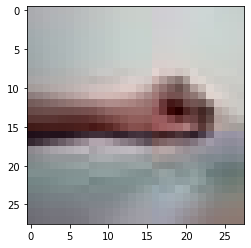

예측확률분포: [0.00604706 0.86826545 0.12568747]
라벨: 2, 예측결과: 1


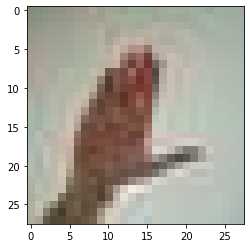

예측확률분포: [4.800486e-06 6.797328e-02 9.320219e-01]
라벨: 1, 예측결과: 2


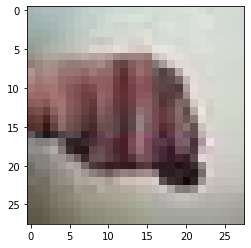

예측확률분포: [3.8846982e-01 2.3842289e-04 6.1129177e-01]
라벨: 0, 예측결과: 2


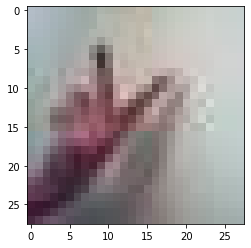

예측확률분포: [0.04007105 0.9179161  0.04201286]
라벨: 2, 예측결과: 1


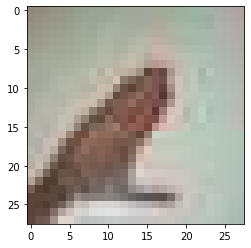

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)


wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()